# Introduction to Data Science 2021

# Week 3

## Exercise 1 | Working with geospatial data (GIS)

To get at least a bit familiar with [GIS](https://en.wikipedia.org/wiki/Geographic_information_system) data and the concept of map projections, we’ll do a simple task of plotting two data sets that are given in different coordinate systems.

1. Download the [world_m.zip](https://github.com/HY-TKTL/intro-to-data-science-2017/blob/master/world_m.zip) and [cities.zip](https://github.com/HY-TKTL/intro-to-data-science-2017/blob/master/cities.zip) files that each include a set of GIS files. Most notably, the <span style="background-color: #ccfff2">shp</span> files are [Shapefile-files](https://en.wikipedia.org/wiki/Shapefile) with coordinates (don’t look, it’s binary!). The <span style="background-color: #ccfff2">prj</span> files contain information (in plain text, so okay to look) about the coordinate systems. Open the files using your favorite programming environment and packages.  

    <span style="background-color: #ccfff2"> *Hint: We warmly recommend [Geopandas](http://geopandas.org/) for pythonistas.*</span>

In [19]:
"""
DISCLAIMER
In order to have a clean workspace, world_m dataset files are into a folder called "world_m", and same for cities (folder "cities") and hasy dataset (folder "hasyv2")
"""

import geopandas as gpd

world_m = gpd.read_file('./world_m')
cities = gpd.read_file('./cities')

display(world_m.head(5), cities.head(5))

,pop_est,continent,name,iso_a3,gdp_md_est,gdp_per_ca,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,0.000784,"POLYGON ((6813956.990 4227673.562, 6927484.435..."
1,12799293.0,Africa,Angola,AGO,110300.0,0.008618,"MULTIPOLYGON (((1817460.823 -651055.118, 18449..."
2,3639453.0,Europe,Albania,ALB,21810.0,0.005993,"POLYGON ((2292095.859 5110825.730, 2277950.230..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,0.038408,"POLYGON ((5741805.754 2765811.385, 5761611.935..."
4,40913584.0,South America,Argentina,ARG,573900.0,0.014027,"MULTIPOLYGON (((-7291426.647 -7365665.131, -73..."


,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)


2. The <span style="background-color: #ccfff2">world_m</span> file contains borders of almost all countries in the world. Plot the world.

<AxesSubplot:>

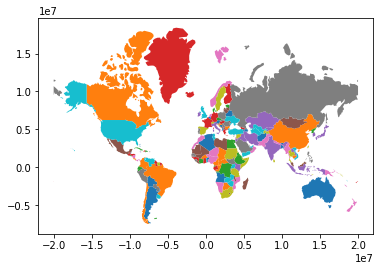

In [20]:
world_m.plot("name")

3. On top of the countries that you just plotted, plot another layer of information, namely the capital cities of each country from the <span style="background-color: #ccfff2">cities</span> data-set. However, depending on how clever your programming environment is, the cities will probably all appear to be in the Gulf of Guinea, near the coordinates (0°, 0°).

<AxesSubplot:>

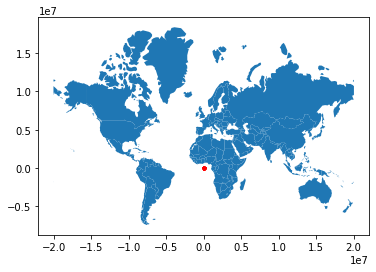

In [21]:
base = world_m.plot()
cities.plot(ax=base, marker='o', color='red', markersize=5)

4. Perform a map projection to bring the two data-sets into a shared coordinate system. (You can choose which one.) Now plot the two layers together to make sure the capital cities are where they are supposed to be.

<AxesSubplot:>

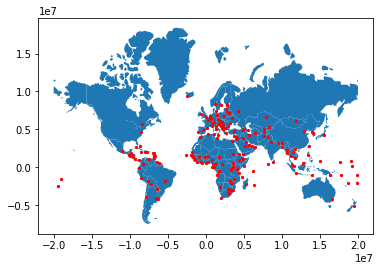

In [22]:
capitals = cities.to_crs(world_m.crs)
base = world_m.plot()
capitals.plot(ax=base, marker='o', color='red', markersize=5)

**Remember to submit your code on Moodle. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 2 | Symbol classification

We’ll be looking into machine learning by checking out the [HASYv2](https://zenodo.org/record/259444#.Wb7efZ8xDhZ) dataset that contains hand written mathematical symbols as images. The whole dataset is quite big, so we’ll restrict ourselves to doing 10-class classification on some of the symbols. Download the data and complete the following tasks.

1. Extract the data and find inside a file called <span style="background-color: #ccfff2">hasy-data-labels.csv</span>. This file contains the labels for each of the images in the <span style="background-color: #ccfff2">hasy_data</span> folder. Read the labels in and only keep the rows where the <span style="background-color: #ccfff2">symbol_id</span> is within the inclusive range <span style="background-color: #ccfff2">[70, 80]</span>. Read the corresponding images as black-and-white images and flatten them so that each image is a single vector of shape <span style="background-color: #ccfff2">32x32 = 1024</span>. Your dataset should now consist of your input data of shape <span style="background-color: #ccfff2">(1020, 1024)</span> and your labels of shape <span style="background-color: #ccfff2">(1020, )</span>. That is, a matrix of shape <span style="background-color: #ccfff2">1020 x 1024</span> and a vector of size <span style="background-color: #ccfff2">1020</span>.

In [23]:
import pandas as pd
import numpy as np
import cv2
from matplotlib import pyplot as plt

labels = pd.read_csv('./hasyv2/hasy-data-labels.csv', sep=',')
labels = labels[labels['symbol_id'] >= 70]
labels = labels[labels['symbol_id'] <= 80]
paths = labels['path']
labels = labels['latex']

images = np.array([np.array(cv2.cvtColor(cv2.imread('hasyv2/'+file),cv2.COLOR_BGR2GRAY)).reshape(-1) for file in paths])

display(labels.shape, images.shape)


(1020,)

(1020, 1024)

2. Shuffle the data, and then split it into training and test sets, using the first 80% of the data for training and the rest for evaluation.

In [24]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(images, labels, test_size=0.2, shuffle=True, random_state=12)

3. Fit a logistic regression classifier on your data. Note that we have a multi-class classification problem, but the logistic regression is a binary classifier. For this reason, you will find useful <span style="background-color: #ccfff2">[Sklearn's "multi_class" attribute](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)</span>. Use a multinomial loss, and the softmax function to predict the probability of each class as the outcome.  The classifier should select the class with the highest probability. Most library implementations will do this for you - feel free to use one.

In [25]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg').fit(X_train, y_train)

clf.score(X_test, y_test)

0.8529411764705882

4. To get an idea of how good the model did, let’s create our own classifier that simply guesses the most common class in the training set (looking at the test set here would be cheating!). Then, evaluate your logistic regression model on the test data, and compare it to the majority class classifier. The logistic regression model should have significantly better accuracy - our naive model is merely making a guess.

In [26]:
from scipy.stats import mode
from sklearn.metrics import accuracy_score

# bad prediction
bad_pred = [mode(y_train)[0] for i in range(len(y_test))]
bad = accuracy_score(y_test, bad_pred)

# good prediction
good_pred = clf.predict(X_test)
good = accuracy_score(y_test, good_pred)

display(bad, good)

0.11764705882352941

0.8529411764705882

5. Plot some of the images that the logistic classifier classified wrongly. Can you think of why this happens? Would you have gotten it right?
    
    <span style="background-color: #ccfff2">*Hint: Scipy has a [function](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.misc.imshow.html) for this.*</span>

Here are some examples of the syntax used to fit a logistic regression classifier (using Sklearn or statsmodel with Python, or GLM with R):

In [9]:
#Sklearn (python)

#from sklearn.linear_model import LogisticRegression

#Fit on the training data set, with:
#X : {array-like, sparse matrix}, shape (n_samples, n_features) , n_samples rows x n_features columns
#with attributes that describe each sample.
#y : array-like, shape (n_samples,) , n_samples target values for each sample.

#model = LogisticRegression()
#model.fit(X, y) 

In [10]:
#Statsmodels (python)

#import statsmodels.api as sm
#model = sm.Logit(y, X)

In [11]:
#GLM (R)

#model <- glm(y ~.,family=binomial(link='logit'), data=X) 

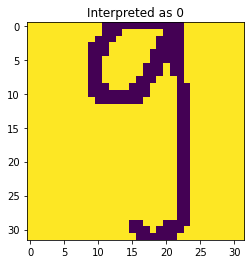

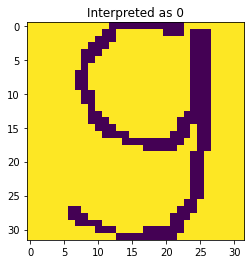

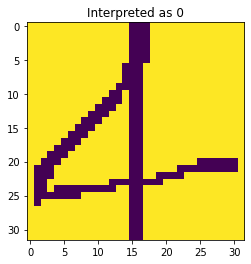

In [28]:
from collections import defaultdict
from matplotlib import pyplot as plt

count = 0

for i in range(len(y_test)):
    if y_test.values[i] != bad_pred[i][0]:
        plt.imshow(X_test[i].reshape(32,32,1))
        plt.title('Interpreted as ' + str(bad_pred[i][0]))
        plt.show()
        count += 1
    if count == 3:
        break

# This happens because our custom classifier only guess the class based on the most frequent value, i.e.
# the mode; the great majority is then classified as 0, while the scikit model classifies with more
# precision.

**Remember to submit your code on Moodle. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**